In [2]:
#install and import libraries
import importlib
def check_and_install(package):
    try:
        importlib.import_module(package)
    except ImportError:
        print(f"{package} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', package])
            print(f"{package} has been successfully installed.")
        except Exception as e:
            print(f"An error occurred while installing {package}: {e}")

import_libraries = ['requests', 'numpy', 'matplotlib',"pandas", "warnings","time","seaborn","openpyxl","datetime","scipy","random"]

for library in import_libraries:
    check_and_install(library)

import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
import time
import seaborn as sns
from datetime import datetime
import random
import scipy
warnings.filterwarnings("ignore")

### Read Data and Plot covariance and correlation matrix

In [3]:
df = pd.read_csv("../Data/prefinal_submission_log.csv")
df = df[['date', 'Swiss Performance Index SPI', 'SWX New SPI Index', 'SPI EXTRA',
       'SPI Inhaber mit Div.-Korr', 'SPI Namen mit Div.-Korr',
       'SPI Inhaber + PS mit Div Kor', 'SPI PS mit Div.-Korr',
       'SPI Small Companies mit Div', 'SPI Middle Companies mit Div.K',
       'SPI Large Companies mit Div.Kor', 'SPI Small + Middle C. mit Div.',
       'SPI Large+Middle Comp mit Div Korr', 'All Share SWI mit Div. Korr.',
       'SPI ex SLI', 'hsbng', 'gold', 'SBI For AAA-BBB M 1-5',
       'SBI For AAA-BBB M 5-10', 'SBI Dom Gov M 3-7', 'SBI Dom Gov M 7-15',
       'SBI Dom Gov M 1-3', 'SXI Real Estate Broad',
       'SXI Real Estate Shares Broad', 'SXI Real Estate Funds Broad', 
       'sandp500', 'jpm', 'tsla', 'msft', 'nvda', 'googl', 'apple',
       'hon', 'btc','eth','sol', 'xrp']]
#display(df.head())
print(df.columns)
print("start index: ",df[df["date"]=="10-08-2015"].index.values[0])
print("end index: ",df[df["date"]=="11-01-2024"].index.values[0])
df = df.iloc[13970:17035,:].reset_index(drop=True) #we use these indices as base and then group them into the seven day data
df

Index(['date', 'Swiss Performance Index SPI', 'SWX New SPI Index', 'SPI EXTRA',
       'SPI Inhaber mit Div.-Korr', 'SPI Namen mit Div.-Korr',
       'SPI Inhaber + PS mit Div Kor', 'SPI PS mit Div.-Korr',
       'SPI Small Companies mit Div', 'SPI Middle Companies mit Div.K',
       'SPI Large Companies mit Div.Kor', 'SPI Small + Middle C. mit Div.',
       'SPI Large+Middle Comp mit Div Korr', 'All Share SWI mit Div. Korr.',
       'SPI ex SLI', 'hsbng', 'gold', 'SBI For AAA-BBB M 1-5',
       'SBI For AAA-BBB M 5-10', 'SBI Dom Gov M 3-7', 'SBI Dom Gov M 7-15',
       'SBI Dom Gov M 1-3', 'SXI Real Estate Broad',
       'SXI Real Estate Shares Broad', 'SXI Real Estate Funds Broad',
       'sandp500', 'jpm', 'tsla', 'msft', 'nvda', 'googl', 'apple', 'hon',
       'btc', 'eth', 'sol', 'xrp'],
      dtype='object')
start index:  13970
end index:  17043


,date,Swiss Performance Index SPI,SWX New SPI Index,SPI EXTRA,SPI Inhaber mit Div.-Korr,SPI Namen mit Div.-Korr,SPI Inhaber + PS mit Div Kor,SPI PS mit Div.-Korr,SPI Small Companies mit Div,SPI Middle Companies mit Div.K,...,tsla,msft,nvda,googl,apple,hon,btc,eth,sol,xrp
0,10-08-2015,-0.008048,-0.008050,-0.002118,-0.025564,-0.007787,-0.009252,-0.006874,-0.000706,-0.002270,...,NaN,0.012544,0.034221,-0.001883,0.035712,0.017297,0.022123,0.410335,NaN,-0.018399
1,11-08-2015,-0.024758,-0.024756,-0.018760,-0.027322,-0.024284,-0.026955,-0.026902,-0.011053,-0.019588,...,NaN,-0.019629,-0.005059,0.040140,-0.053441,-0.018151,-0.014942,0.131094,NaN,-0.037905
2,12-08-2015,0.014046,0.014049,0.007338,0.007850,0.013252,0.017729,0.019148,0.005187,0.007570,...,NaN,0.007085,0.002533,0.001694,0.015302,0.001612,-0.008657,0.406292,NaN,-0.015096
3,13-08-2015,0.002434,0.002434,0.003241,-0.005984,0.002947,0.000055,0.000913,0.000074,0.003580,...,NaN,-0.000214,-0.008467,-0.007199,-0.000781,-0.000190,0.006041,0.000109,NaN,0.023003
4,14-08-2015,0.004432,0.004428,0.003031,0.000355,0.004186,0.005574,0.006313,0.005329,0.002784,...,NaN,0.005761,0.000850,0.004157,0.007010,0.005293,-0.015663,-0.079074,NaN,0.009978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,26-12-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.015988,0.000214,0.009153,0.000212,-0.002845,0.011603,0.021462,0.063913,-0.051472,0.019865
3061,27-12-2023,-0.004715,-0.004714,-0.004178,-0.008114,-0.004592,-0.005452,-0.005190,0.001471,-0.004821,...,0.018647,-0.001576,0.002796,-0.008159,0.000518,0.004700,-0.018939,-0.013192,-0.047054,0.000225
3062,28-12-2023,0.006463,0.006463,0.003356,0.002872,0.006316,0.007346,0.007785,0.001481,0.003819,...,-0.032104,0.003229,0.002122,-0.000998,0.002224,0.000717,-0.012474,-0.020170,0.040376,-0.018430
3063,29-12-2023,-0.000096,-0.000097,-0.015537,-0.002775,-0.004183,0.024133,0.026724,-0.013170,-0.015780,...,-0.018738,0.002023,0.000000,-0.003858,-0.005439,0.002578,0.001365,-0.003756,-0.042921,-0.002503


In [4]:
#get weekly returns
df["date"] = pd.to_datetime(df["date"], dayfirst= True, format="%d-%m-%Y")
df = df.fillna(0)

def week_returns(local_df):
    # Ensure the 'date' column is in datetime format
    local_df['date'] = pd.to_datetime(local_df['date'], format="%Y-%m-%d")

    # Check if the first day is Monday
    if local_df['date'][0].day_name() == "Monday":
        print("First Day:", local_df['date'][0].day_name())

        # Initialize an empty DataFrame to store weekly returns
        weekly_returns_df = pd.DataFrame()
        local_date = []

        # Iterate through each 7-day period
        for i, j in enumerate(range(0, len(local_df), 7)):
            local_date.append(local_df.date[j])
            local_week_sum = local_df.iloc[j:j+7, 1:].sum(axis=0).values
            weekly_returns_df = pd.concat([weekly_returns_df, pd.Series(local_week_sum)], axis=1)

        return_df = pd.DataFrame()
        return_df = weekly_returns_df.T.reset_index(drop=True)
        return_df.insert(0,"date",pd.Series(local_date))
        return_df.columns = local_df.columns

        return return_df

    else:
        print("First day is not Monday. Ensure it is Monday.")
        return None


result_df = week_returns(df)
result_df

First Day: Monday


,date,Swiss Performance Index SPI,SWX New SPI Index,SPI EXTRA,SPI Inhaber mit Div.-Korr,SPI Namen mit Div.-Korr,SPI Inhaber + PS mit Div Kor,SPI PS mit Div.-Korr,SPI Small Companies mit Div,SPI Middle Companies mit Div.K,...,tsla,msft,nvda,googl,apple,hon,btc,eth,sol,xrp
0,2015-08-10,-0.011894,-0.011897,-0.007269,-0.050665,-0.011687,-0.012849,-0.007402,-0.001169,-0.007924,...,0.000000,0.005547,0.024077,0.036909,0.003802,0.005862,-0.024861,0.530004,0.000000,-0.052642
1,2015-08-17,-0.099755,-0.099753,-0.080736,-0.083060,-0.102617,-0.086588,-0.087086,-0.048285,-0.084297,...,0.000000,-0.087321,-0.092044,-0.068033,-0.092073,-0.070287,-0.203405,0.022721,0.000000,-0.115334
2,2015-08-24,0.041102,0.041102,0.040897,0.037735,0.041796,0.037926,0.037954,0.020768,0.043121,...,0.000000,0.019771,0.057029,0.024025,0.068778,0.011463,0.088861,0.098144,0.000000,0.063696
3,2015-08-31,-0.013318,-0.013315,-0.011897,-0.002936,-0.013660,-0.011743,-0.012997,-0.006725,-0.012462,...,0.000000,-0.030508,-0.044072,-0.047702,-0.036129,-0.034895,0.041678,-0.085730,0.000000,0.004316
4,2015-09-07,-0.000698,-0.000697,0.007466,-0.009079,0.001001,-0.008510,-0.008428,0.008517,0.007349,...,0.000000,0.020212,0.040546,0.041025,0.044217,0.030888,-0.039126,-0.353281,0.000000,-0.067081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2023-11-27,0.008369,0.008368,-0.002695,0.033085,0.004135,0.033489,0.033527,-0.000467,0.001381,...,0.014253,-0.007767,-0.021388,-0.035975,0.006663,0.022343,0.119432,0.101148,0.110962,0.032921
434,2023-12-04,0.015104,0.015105,0.017801,0.033149,0.012371,0.030931,0.030719,0.007515,0.020510,...,0.020760,-0.000748,0.015721,0.023460,0.023105,-0.016158,-0.017694,-0.008343,0.134257,-0.006690
435,2023-12-11,0.005010,0.005008,0.019153,-0.014782,0.010948,-0.029762,-0.031213,0.010005,0.022436,...,0.038852,-0.009397,0.028717,-0.017864,0.009459,0.044177,0.032905,-0.003289,0.055019,-0.012461
436,2023-12-18,-0.003791,-0.003791,-0.002038,0.003179,-0.003157,-0.007598,-0.008653,0.014467,-0.004002,...,-0.003794,0.010331,-0.001228,0.064892,-0.020299,0.010953,0.022952,0.024629,0.488255,0.053723


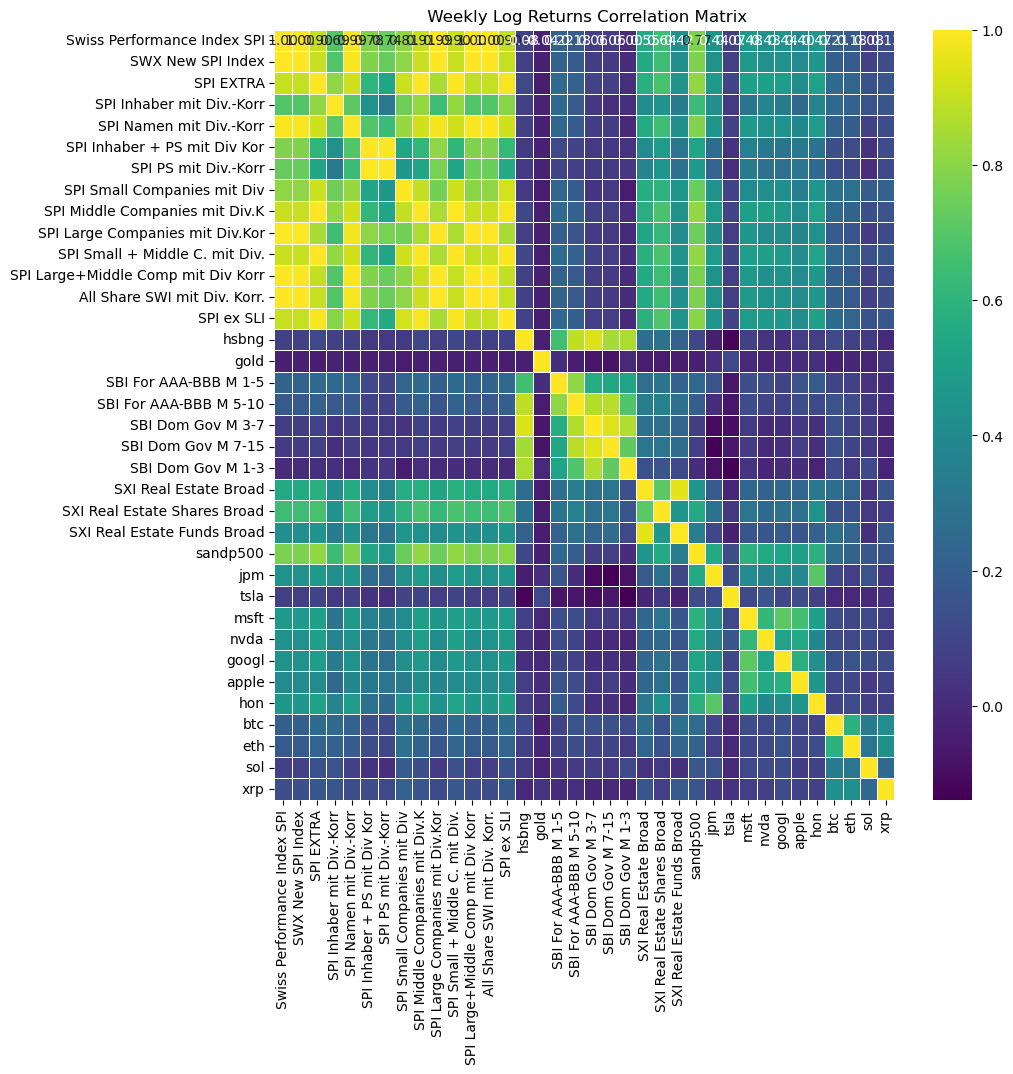

In [5]:
#get the correlation matrix
correlation_matrix = result_df.dropna().iloc[:,1:].corr()
#step2: plot
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', linewidths=.5)
plt.title(' Weekly Log Returns Correlation Matrix')
plt.show()

In [6]:
#covariance matrix
cov_matrix = result_df.iloc[:,1:].cov()
print(cov_matrix)
# plt.figure(figsize=(10, 8))
# sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
# plt.title('Covariance Matrix Heatmap')
# plt.show()

                                    Swiss Performance Index SPI  \
Swiss Performance Index SPI                        4.321150e-04   
SWX New SPI Index                                  4.321119e-04   
SPI EXTRA                                          4.323200e-04   
SPI Inhaber mit Div.-Korr                          4.671910e-04   
SPI Namen mit Div.-Korr                            4.454825e-04   
SPI Inhaber + PS mit Div Kor                       3.721441e-04   
SPI PS mit Div.-Korr                               3.662926e-04   
SPI Small Companies mit Div                        2.973724e-04   
SPI Middle Companies mit Div.K                     4.355937e-04   
SPI Large Companies mit Div.Kor                    4.339692e-04   
SPI Small + Middle C. mit Div.                     4.217890e-04   
SPI Large+Middle Comp mit Div Korr                 4.345937e-04   
All Share SWI mit Div. Korr.                       4.317071e-04   
SPI ex SLI                                         3.970761e-0

In [61]:
#get weekly returns together with and without crypto
without_crypto_df = result_df.iloc[:,:-4]
with_crypto_df = result_df
without_crypto_df["year"] = without_crypto_df["date"].dt.year
with_crypto_df["year"] = with_crypto_df["date"].dt.year

In [8]:
#save the weekly file
with_crypto_df.to_csv("../Data/weekly_log_returns_final.csv",index=False)

### Do the sharpe ratio and other calculations

In [3]:
with_crypto_df = pd.read_csv("../Data/weekly_log_returns_final.csv")
with_crypto_df["date"] = pd.to_datetime(with_crypto_df["date"])
#get weekly returns together with and without crypto
without_crypto_df = with_crypto_df.iloc[:,:-4]
without_crypto_df["year"] = without_crypto_df["date"].dt.year
with_crypto_df["year"] = with_crypto_df["date"].dt.year

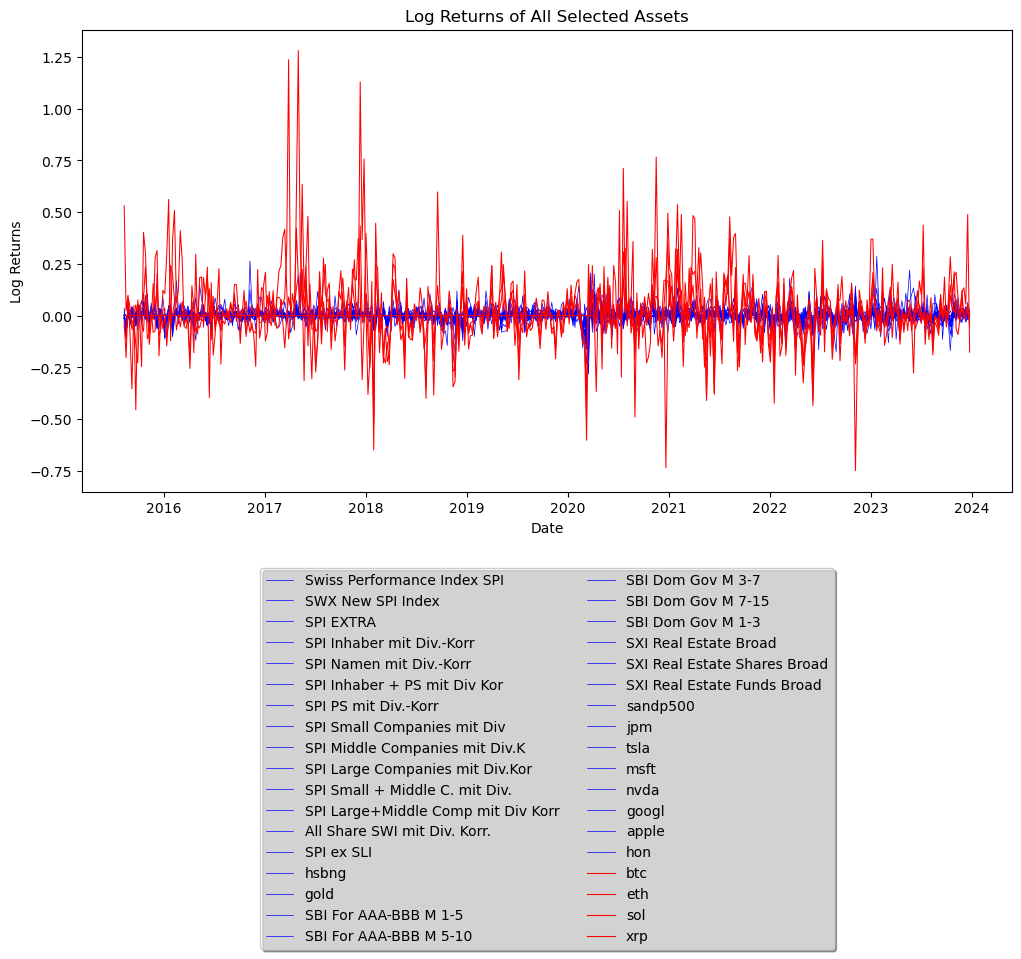

In [4]:
# Plotting log returns
plt.figure(figsize=(12, 6))
for i, column in enumerate(with_crypto_df.iloc[:,1:-1].columns):
    if i < len(with_crypto_df.iloc[:,1:-1].columns) - 4:
        plt.plot(with_crypto_df['date'], with_crypto_df[column], label=column, color='blue', linewidth=0.5)
    else:
        plt.plot(with_crypto_df['date'], with_crypto_df[column], label=column, color='red', linewidth=0.75)

plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.title('Log Returns of All Selected Assets')
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0.5))  # Set legend background color with alpha
plt.show()

In [5]:
with_crypto_df.columns

Index(['date', 'Swiss Performance Index SPI', 'SWX New SPI Index', 'SPI EXTRA',
       'SPI Inhaber mit Div.-Korr', 'SPI Namen mit Div.-Korr',
       'SPI Inhaber + PS mit Div Kor', 'SPI PS mit Div.-Korr',
       'SPI Small Companies mit Div', 'SPI Middle Companies mit Div.K',
       'SPI Large Companies mit Div.Kor', 'SPI Small + Middle C. mit Div.',
       'SPI Large+Middle Comp mit Div Korr', 'All Share SWI mit Div. Korr.',
       'SPI ex SLI', 'hsbng', 'gold', 'SBI For AAA-BBB M 1-5',
       'SBI For AAA-BBB M 5-10', 'SBI Dom Gov M 3-7', 'SBI Dom Gov M 7-15',
       'SBI Dom Gov M 1-3', 'SXI Real Estate Broad',
       'SXI Real Estate Shares Broad', 'SXI Real Estate Funds Broad',
       'sandp500', 'jpm', 'tsla', 'msft', 'nvda', 'googl', 'apple', 'hon',
       'btc', 'eth', 'sol', 'xrp', 'year'],
      dtype='object')

In [6]:
#average annual risk free rates taken from fred and swiss national bank data
def percentage_to_float(percentage_str):
    return float(percentage_str.strip('%')) / 100

rf_df = pd.read_csv("../Data/risk_free_rates.csv")[["year","us","swiss"]]
rf_df[["us", "swiss"]] = rf_df[["us", "swiss"]].applymap(percentage_to_float)
rf_df

,year,us,swiss
0,2010,0.0322,0.0165
1,2011,0.0278,0.0148
2,2012,0.0180,0.0066
3,2013,0.0235,0.0093
4,2014,0.0254,0.0073
5,2015,0.0214,-0.0006
6,2016,0.0184,-0.0035
7,2017,0.0233,-0.0008
8,2018,0.0291,0.0004
9,2019,0.0214,-0.0047


In [8]:
avg_rf_us = rf_df[rf_df.year>2014]["us"].mean()
avg_rf_swiss = rf_df[rf_df.year>2014]["swiss"].mean()

reference: https://medium.com/@prayaaggupta/how-to-determine-optimal-stock-portfolio-weights-using-python-and-quantopian-a89cd6376ded

In [9]:
len(with_crypto_df.iloc[:,1:-1].columns)

36

In [65]:
def calculate_betas(local_df, market_column):
    local_betas = []
    for column_name in local_df.columns:
        local_betas.append(local_df[column_name].cov(local_df[market_column]) / local_df[market_column].var())
    return np.array(local_betas)

def get_sharpe(local_df, local_rf, market_column = "sandp500"): #we give weekly log returns directly
    random.seed(42)
    num_ports = 15000
    all_weights = np.zeros((num_ports,len(local_df.columns)))
    ret_arr = np.zeros(num_ports)
    vol_arr = np.zeros(num_ports)
    sharpe_arr = np.zeros(num_ports)
    log_ret = local_df
    local_betas = calculate_betas(local_df, market_column)
    local_market_return = local_df[market_column].mean()*52
    for ind in range(num_ports):
        # Create Random Weights
        weights = np.array(np.random.random([all_weights.shape[1]]))

        # Rebalance Weights
        weights = weights / np.sum(weights)
        
        # Save Weights
        all_weights[ind,:] = weights

        # Expected Return
        ret_arr[ind] = np.sum((log_ret.mean() * weights) *52)

        # Expected Variance
        vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() *52, weights)))

        # Sharpe Ratio using Swiss Riskfree rate
        sharpe_arr[ind] = (ret_arr[ind]-local_rf)/vol_arr[ind]

    local_portfolio_beta = np.dot(local_betas,all_weights[sharpe_arr.argmax(),])
    local_portfolio_return = ret_arr[sharpe_arr.argmax()]
    local_jensen_alpha = (local_portfolio_return-(local_rf+ local_portfolio_beta*(local_market_return-local_rf))).values[0]
    #print("local_jensen_alpha: ", local_jensen_alpha)
    #get max values
    # print("greatest sharpe ratio: ", sharpe_arr.max(),  "at location :", sharpe_arr.argmax())
    # print("\n \nweights for max:\n ", all_weights[sharpe_arr.argmax(),])

    #gives out 1. all volatilites, all returns, highest sharpe ration return and volatility, all the weights, sharpe highest, and sharpe_arr
    return vol_arr,ret_arr, ret_arr[sharpe_arr.argmax()], vol_arr[sharpe_arr.argmax()], all_weights[sharpe_arr.argmax(),], sharpe_arr.max(), sharpe_arr, local_jensen_alpha


def plot_yearly_sharpe(local_df, local_rf_df,country):
    returns_df = local_df.drop(columns=['date',"year"])
    years_len = len(local_df.year.unique())
    num_rows = int(years_len**0.5)
    num_cols = num_rows
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10), sharex=True)
    axs = axs.flatten()

    #group them by year
    local_grouped_df = local_df.iloc[:,1:].groupby(local_df["year"])
    for i, (year, group) in enumerate(local_grouped_df):
        group = group.drop(columns = "year")
        #print(group.columns)
        ax = axs[i]
        local_rf = local_rf_df[local_rf_df.year==int(year)][country]
        local_vol_arr,local_ret_arr,local_high_ret, local_high_vol, local_high_weights, local_high_sharpe, local_sharpe_arr, local_high_alpha = get_sharpe(group, local_rf)
        sc = ax.scatter(local_vol_arr, local_ret_arr, c=local_sharpe_arr, cmap='plasma')
        # Add colorbar
        plt.colorbar(sc, ax=ax, label='Sharpe Ratio')

        # Set title, xlabel, ylabel
        ax.set_title(f"Sharpe Ratio for Portfolio in {year}")
        ax.set_xlabel('Volatility')
        ax.set_ylabel('Return')

        # Plotting additional point in green
        ax.scatter(local_high_vol, local_high_ret, c="green", s=50, edgecolors="black", label=f"Sharpe: {round(local_high_sharpe, 2)},\n Jensen's Alpha: {round(local_high_alpha, 2)}")

        ax.legend()
    plt.tight_layout()
    plt.show()

Using US risk free rates
With out using digital currencies, portfolio sharpe ratios


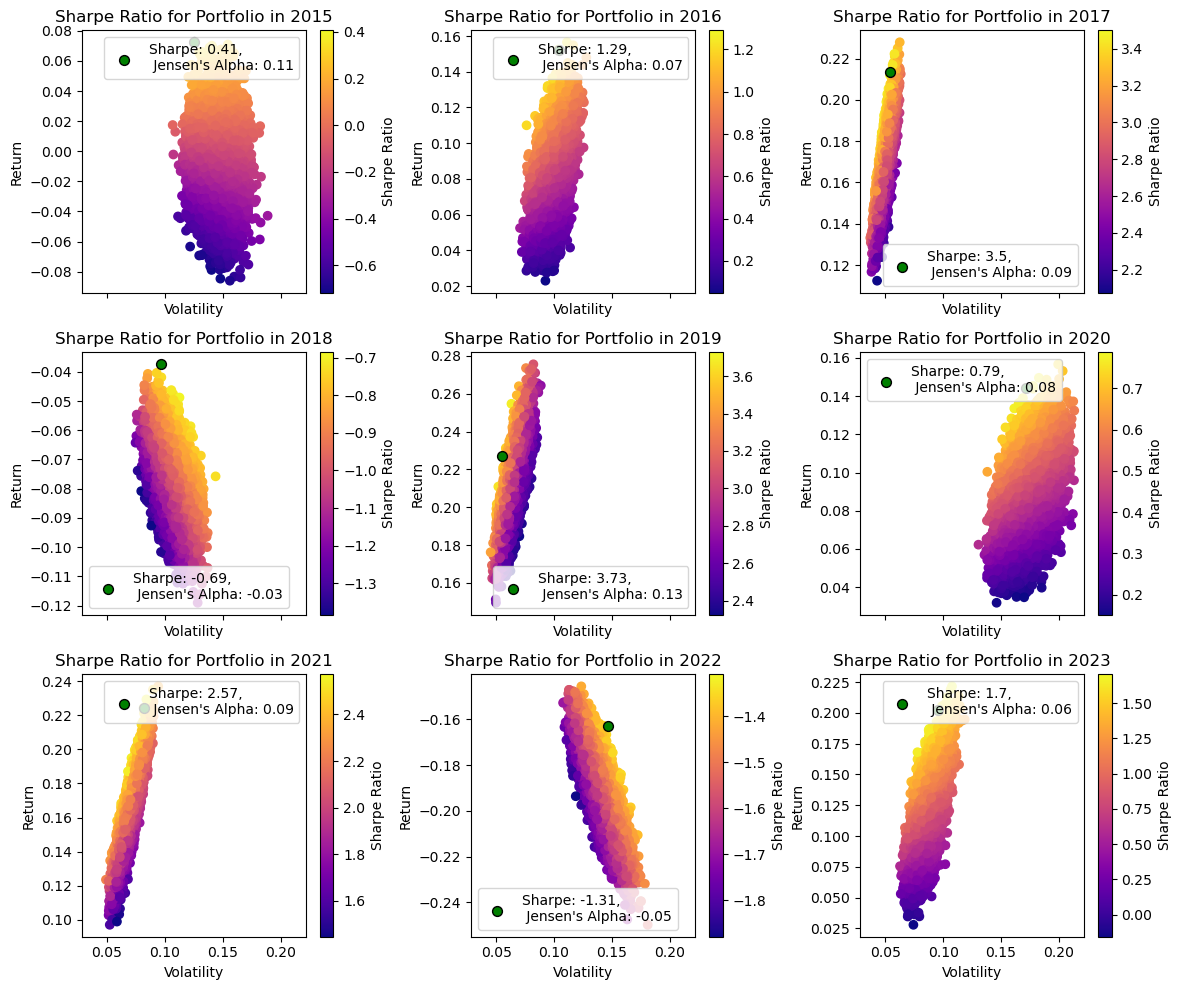

With using digital currencies, portfolio sharpe ratios


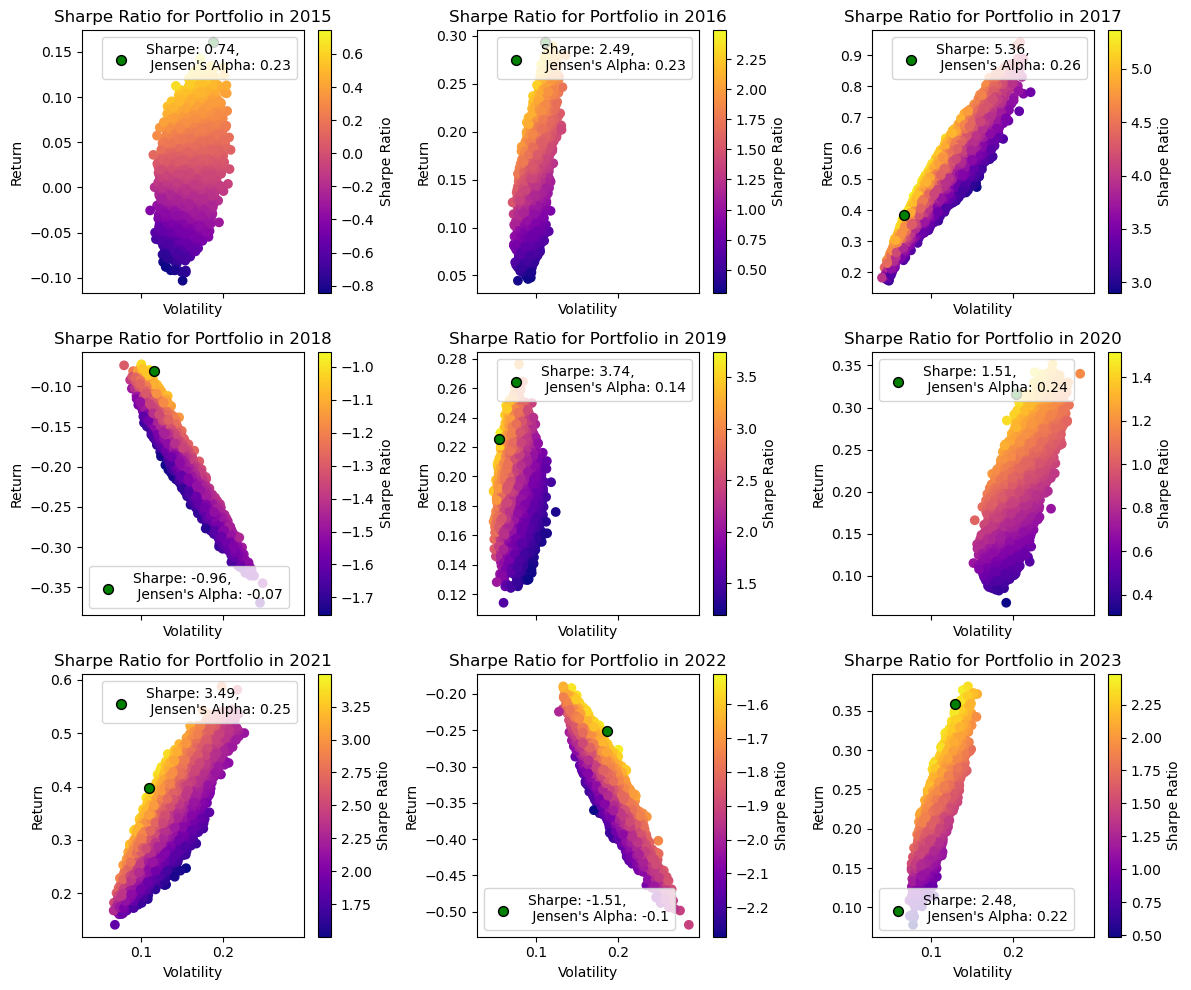

In [66]:
print("Using US risk free rates")
#plot the sharpe graphs for with and without crypto <- US risk fee rates
print("With out using digital currencies, portfolio sharpe ratios")
plot_yearly_sharpe(without_crypto_df, rf_df, "us") #without crpto

print("With using digital currencies, portfolio sharpe ratios")
plot_yearly_sharpe(with_crypto_df, rf_df, "us") #without crpto

Using Swiss risk free rates
With out using digital currencies, portfolio sharpe ratios


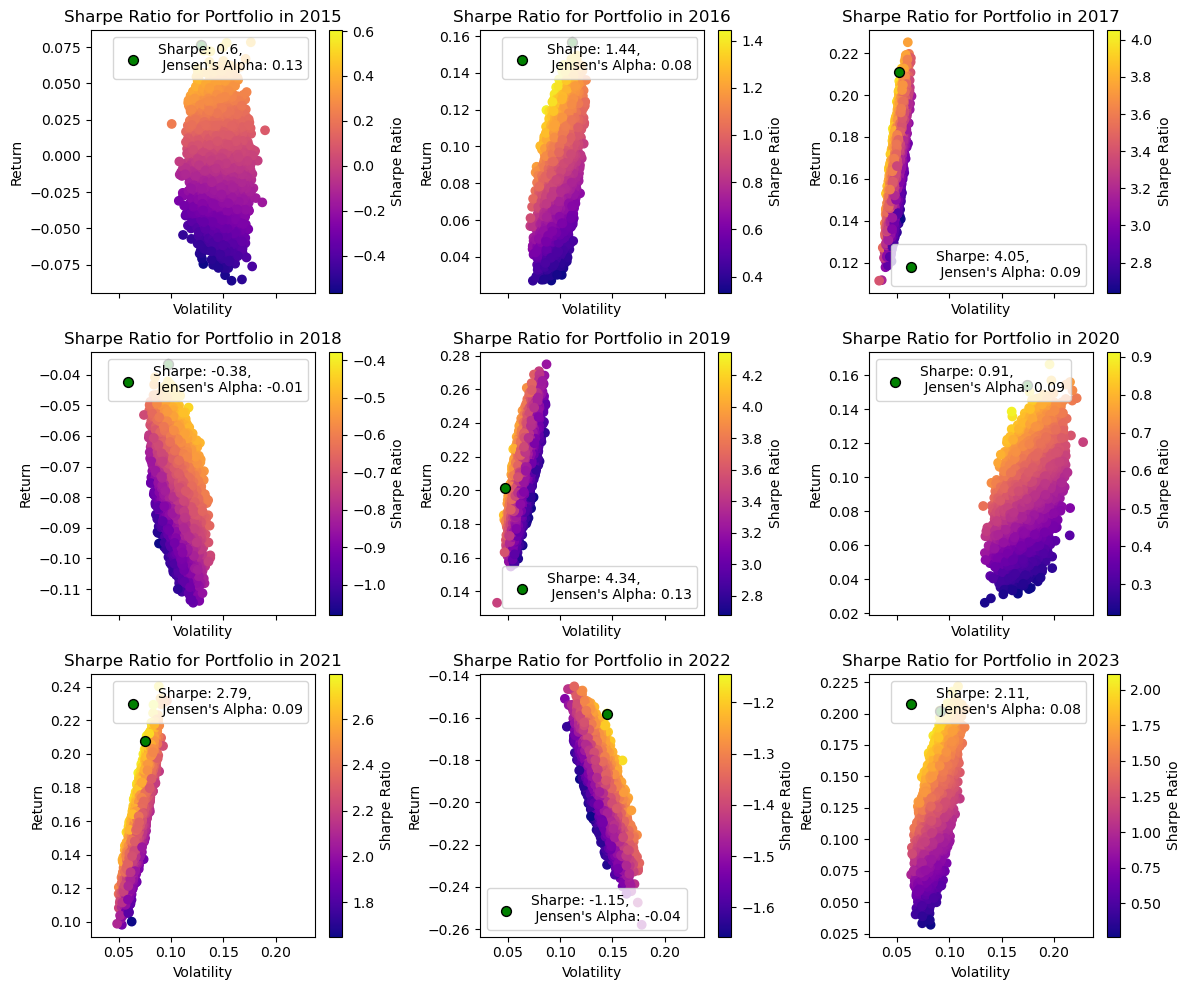

With using digital currencies, portfolio sharpe ratios


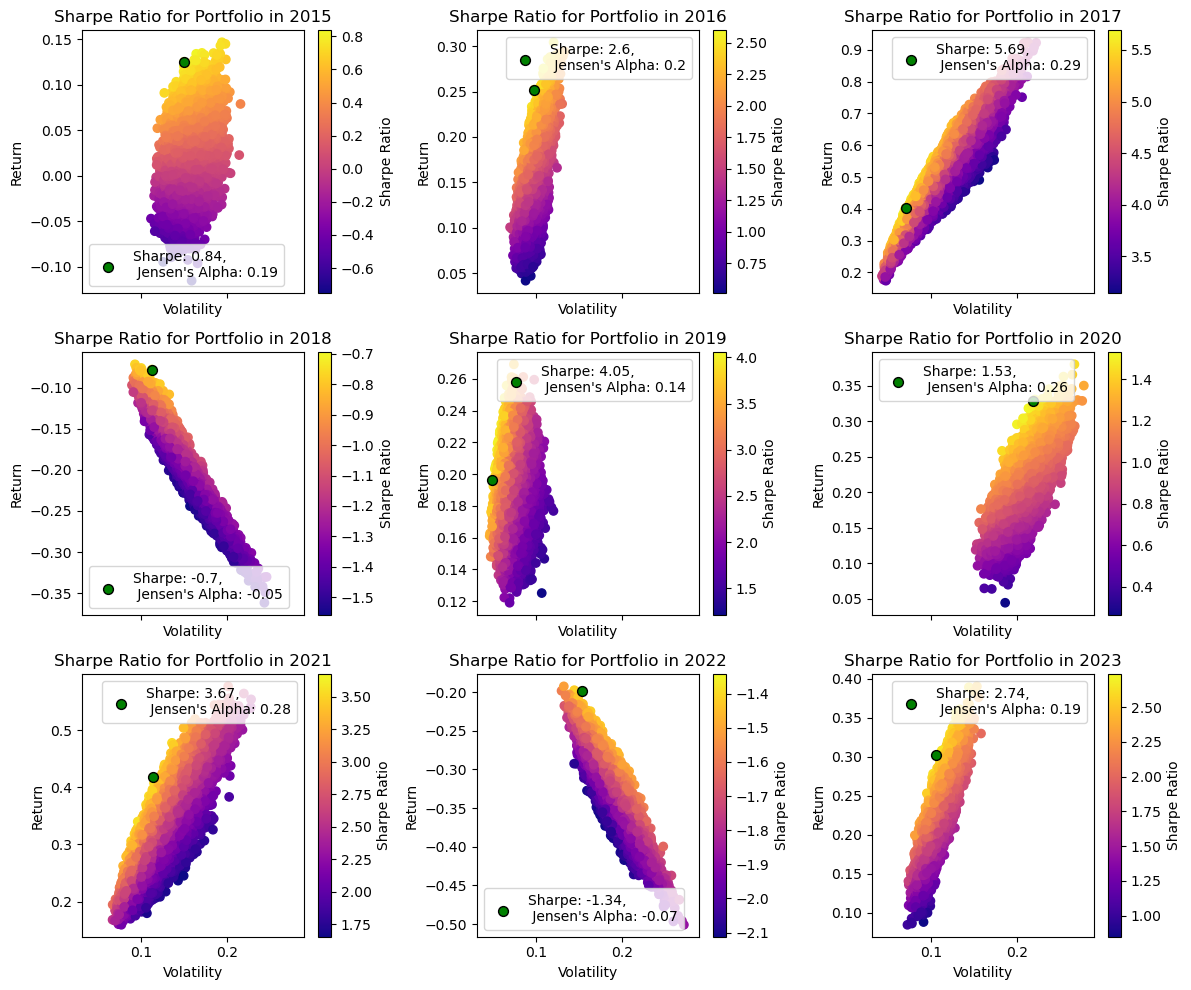

In [67]:
print("Using Swiss risk free rates")
#plot the sharpe graphs for with and without crypto <- US risk fee rates
print("With out using digital currencies, portfolio sharpe ratios")
plot_yearly_sharpe(without_crypto_df, rf_df, "swiss") #without crpto

print("With using digital currencies, portfolio sharpe ratios")
plot_yearly_sharpe(with_crypto_df, rf_df, "swiss") #without crpto

In [38]:
without_crypto_df.iloc[:,1:-1].shape

(438, 32)

greatest sharpe ratio:  0.8865521814900311 at location : 7116

 
weights for max:
  [0.00923272 0.00513107 0.02038599 0.00911745 0.00067707 0.041277
 0.00167124 0.01087548 0.01390278 0.01341794 0.01872828 0.01256063
 0.00477609 0.01628204 0.03014814 0.01200187 0.02565083 0.07706809
 0.00936402 0.03131992 0.09495763 0.00634014 0.04104385 0.01046361
 0.06982439 0.02087194 0.04316567 0.09288273 0.06874642 0.03657468
 0.07871831 0.07282197]


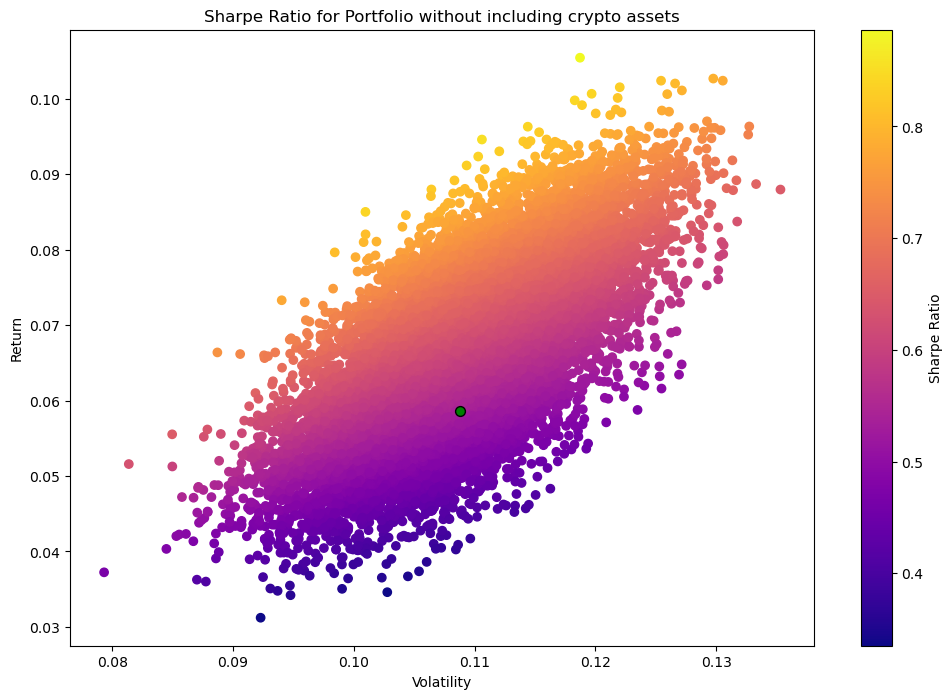

In [73]:
import random
random.seed(42)
#get weights using given data and with crypto using montecarlo simulation
num_ports = 15000

all_weights = np.zeros((num_ports,len(without_crypto_df.iloc[:,1:-1].columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
log_ret = without_crypto_df.iloc[:,1:-1]
market_column = "sandp500"
market_return = without_crypto_df[market_column].mean()*52
betas_all = calculate_betas(without_crypto_df.iloc[:,1:-1], market_column)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random([all_weights.shape[1]]))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *52)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() *52, weights)))

    # Sharpe Ratio using Swiss Riskfree rate
    sharpe_arr[ind] = (ret_arr[ind]-avg_rf_swiss)/vol_arr[ind]

#jensen's alpha <- find beta and market return
portfolio_beta = np.dot(betas_all,all_weights[sharpe_arr.argmax(),])
portfolio_return = ret_arr[sharpe_arr.argmax()]
jensen_alpha = (portfolio_return-(avg_rf_swiss+ portfolio_beta*(market_return-avg_rf_swiss)))

#get max values
print("greatest sharpe ratio: ", sharpe_arr.max(),  "at location :", sharpe_arr.argmax())
print("\n \nweights for max:\n ", all_weights[sharpe_arr.argmax(),])

max_sr_ret = ret_arr[126]
max_sr_vol = vol_arr[126]
plt.figure(figsize= (12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label= 'Sharpe Ratio')
plt.title("Sharpe Ratio for Portfolio without including crypto assets")
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret, c= "green", s = 50, edgecolors= "black",label=f"Sharpe: {round(sharpe_arr.max(), 2)},\n Jensen's Alpha: {round(jensen_alpha, 2)}")
plt.show()

greatest sharpe ratio:  1.1419632986143613 at location : 9822

 
weights for max:
  [0.00101222 0.03312036 0.00167428 0.02614225 0.02747912 0.00556372
 0.0423557  0.01045238 0.01798421 0.02162198 0.05765864 0.03545861
 0.01852889 0.0006582  0.03993318 0.05936389 0.00146916 0.00906065
 0.02758443 0.0055714  0.01506031 0.06075544 0.04670192 0.01445267
 0.00445776 0.02907803 0.02613148 0.03962291 0.05790203 0.04201883
 0.0539866  0.02092741 0.03586326 0.05326514 0.04982943 0.00725353]


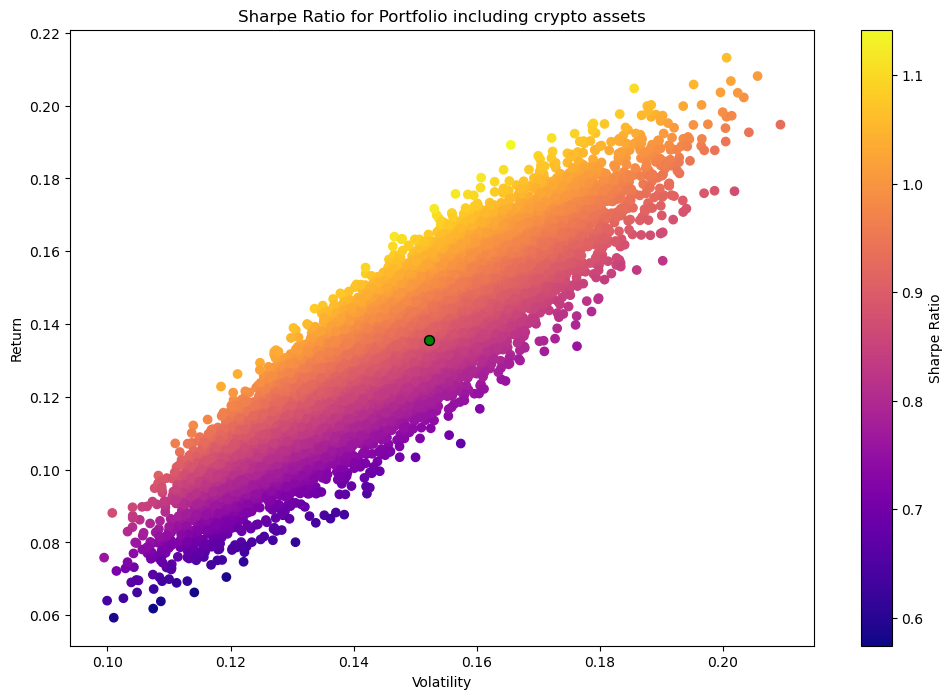

In [74]:
random.seed(42)
#get weights using given data and with crypto using montecarlo simulation
num_ports = 15000

all_weights = np.zeros((num_ports,len(with_crypto_df.iloc[:,1:-1].columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
log_ret = with_crypto_df.iloc[:,1:-1]
market_column = "sandp500"
market_return = with_crypto_df[market_column].mean()*52
betas_all = calculate_betas(with_crypto_df.iloc[:,1:-1],market_column)

for ind in range(num_ports):
    # Create Random Weights
    weights = np.array(np.random.random([all_weights.shape[1]]))
    # Rebalance Weights
    weights = weights / np.sum(weights)
    # Save Weights
    all_weights[ind,:] = weights
    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *52)
    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() *52, weights)))
    # Sharpe Ratio
    sharpe_arr[ind] = (ret_arr[ind]-avg_rf_swiss)/vol_arr[ind]

#jensen's alpha <- find beta and market return
portfolio_beta = np.dot(betas_all,all_weights[sharpe_arr.argmax(),])
portfolio_return = ret_arr[sharpe_arr.argmax()]
jensen_alpha = (portfolio_return-(avg_rf_swiss+ portfolio_beta*(market_return-avg_rf_swiss)))

#get max values
print("greatest sharpe ratio: ", sharpe_arr.max(),  "at location :", sharpe_arr.argmax())
print("\n \nweights for max:\n ", all_weights[sharpe_arr.argmax(),])

max_sr_ret = ret_arr[126]
max_sr_vol = vol_arr[126]
plt.figure(figsize= (12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label= 'Sharpe Ratio')
plt.title("Sharpe Ratio for Portfolio including crypto assets")
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret, c= "green", s = 50, edgecolors= "black",label=f"Sharpe: {round(sharpe_arr.max(), 2)},\n Jensen's Alpha: {round(jensen_alpha, 2)}")
plt.show()

In [ ]:
#another similar method
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])
  
  from scipy.optimize import minimize
  
  def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1
  
  # Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1
  
  # By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

# 0-1 bounds for each weight
bounds = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

# Initial Guess (equal distribution)
init_guess = [0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0565]

# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method = 'SLSQP',bounds=bounds,constraints=cons)

opt_results #maximum sharpe value is actually 3.35

Effecient frontier
source: 
1. https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/
2. https://www.youtube.com/watch?v=Usxer0D-WWM

In [78]:
#do mvp for portfolio and effecient frontier



SyntaxError: invalid syntax (2189937400.py, line 11)